In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , accuracy_score, plot_confusion_matrix

In [2]:
df = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv" , low_memory=False)

In [3]:
df.drop(['TelephonyManager.getSimCountryIso'], axis=1, inplace=True)

In [4]:
x = []
for i in range(len(df)):
    x.append(list((df.iloc[i]))[:-1])

In [5]:
x = np.array(x[:-3916]).astype('int16')

In [6]:
y=[]
for i in df['class']:
    if i=='S':
        y.append([0])
    else:
        y.append([1])

In [7]:
y = np.array(y[:-3916])

In [8]:
x.shape , y.shape, y[:4]

((11120, 214),
 (11120, 1),
 array([[0],
        [0],
        [0],
        [0]]))

In [9]:
 x_train, x_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.1, random_state=42)

In [10]:
clf = RandomForestClassifier(n_estimators=100)
random_model = clf.fit(x_train, y_train)

In [11]:
accuracy_score(y_train, random_model.predict(x_train))

0.9986011191047163

In [12]:
accuracy_score(y_test, random_model.predict(x_test))

0.9829136690647482

In [13]:
result = clf.predict(x_test)
cm = confusion_matrix(y_test, result)

In [14]:
print("False positive rate : %f %%" % ((cm[0][1]/float(sum(cm[0])))*100))
print('False negative rate : %f %%' % ((cm[1][0]/float(sum(cm[1])))*100))

False positive rate : 2.294455 %
False negative rate : 1.188455 %


In [15]:
f1_score(y_test, result)

0.9839391377852916

[[511  12]
 [  7 582]]


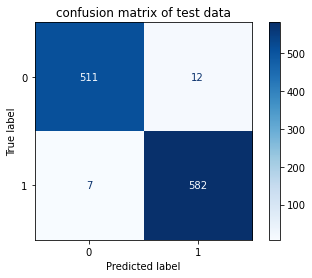

In [16]:
dis = plot_confusion_matrix(random_model, x_test, y_test,cmap=plt.cm.Blues)
dis.ax_.set_title('confusion matrix of test data')
print(dis.confusion_matrix)
plt.show()

[[5023   14]
 [   0 4971]]


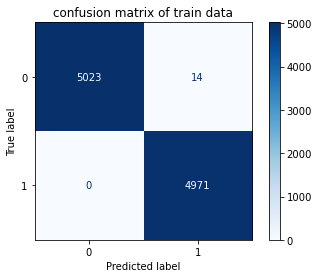

In [17]:
dis = plot_confusion_matrix(random_model, x_train, y_train,cmap=plt.cm.Blues)
dis.ax_.set_title('confusion matrix of train data')
print(dis.confusion_matrix)
plt.show()

In [18]:
new_df = df[['transact','onServiceConnected', 'bindService','attachInterface','ServiceConnection','android.os.Binder',
              'SEND_SMS','Ljava.lang.Class.getCanonicalName','Ljava.lang.Class.getMethods','Ljava.lang.Class.cast',
              'Ljava.net.URLDecoder','android.content.pm.Signature','android.telephony.SmsManager','READ_PHONE_STATE',
              'ClassLoader','Landroid.content.Context.registerReceiver','Ljava.lang.Class.getField',
               'Landroid.content.Context.unregisterReceiver','GET_ACCOUNTS','RECEIVE_SMS','READ_SMS',
              'android.intent.action.BOOT_COMPLETED','TelephonyManager.getLine1Number','TelephonyManager.getSubscriberId',
              'INTERNET','TelephonyManager.getDeviceId','chmod']]

In [19]:
new_df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,android.intent.action.BOOT_COMPLETED,TelephonyManager.getLine1Number,TelephonyManager.getSubscriberId,INTERNET,TelephonyManager.getDeviceId,chmod
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,1,1,0
15032,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,0,0,0,1,1,0


In [20]:
new_x = []
for i in range(len(new_df)):
    new_x.append(list((new_df.iloc[i])))

In [21]:
new_x = np.array(new_x[:-3916]).astype('int16')

In [22]:
new_x.shape

(11120, 27)

In [23]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, y.ravel(), test_size=0.1, random_state=42)

In [24]:
new_clf = RandomForestClassifier(n_estimators=100)
new_random_model = new_clf.fit(new_x_train, new_y_train)

In [25]:
accuracy_score(new_y_train, new_random_model.predict(new_x_train))

0.9822142286171063

In [26]:
accuracy_score(new_y_test, new_random_model.predict(new_x_test))

0.9685251798561151

In [27]:
new_result = new_clf.predict(new_x_test)
new_cm = confusion_matrix(new_y_test, new_result)

In [28]:
print("False positive rate : %f %%" % ((new_cm[0][1]/float(sum(new_cm[0])))*100))
print('False negative rate : %f %%' % ((new_cm[1][0]/float(sum(new_cm[1])))*100))

False positive rate : 3.441683 %
False negative rate : 2.886248 %


In [29]:
f1_score(new_y_test, new_result)

0.9703138252756572

[[505  18]
 [ 17 572]]


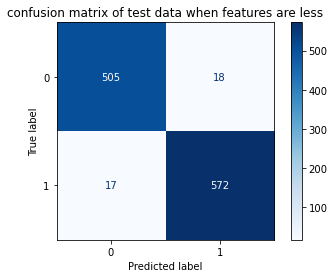

In [30]:
new_dis = plot_confusion_matrix(new_random_model, new_x_test, new_y_test,cmap=plt.cm.Blues)
new_dis.ax_.set_title('confusion matrix of test data when features are less')
print(new_dis.confusion_matrix)
plt.show()

[[4937  100]
 [  78 4893]]


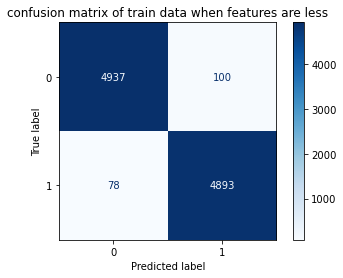

In [31]:
new_dis = plot_confusion_matrix(new_random_model, new_x_train, new_y_train,cmap=plt.cm.Blues)
new_dis.ax_.set_title('confusion matrix of train data when features are less')
print(new_dis.confusion_matrix)
plt.show()